# Import Libraries & Load the DF


In [4]:
import os
import joblib
import pandas as pd
from prophet import Prophet

# Load the dataset
df = pd.read_csv('datasets/DRUG_OVER-2023.csv')

# Display the first few rows of the dataset
df.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value,Date_Month_Year,Date
0,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,126,April2015,2015-04-01
1,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,124,August2015,2015-08-01
2,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,121,December2015,2015-12-01
3,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,127,February2015,2015-02-01
4,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,126,January2015,2015-01-01


In [5]:
# Convert 'Year' and 'Month' columns to datetime format
from datetime import datetime

df['Date'] = df['Year'].astype(str) + '-' + df['Month']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%B')

# Filter data for the period from January 2019 to December 2020
df_forecast = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2023-08-10')]

# Display the first few rows of the filtered dataframe
df_forecast.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value,Date_Month_Year,Date
48,AK,2019,April,12 month-ending,Number of Drug Overdose Deaths,119.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,119,April2019,2019-04-01
49,AK,2019,August,12 month-ending,Number of Drug Overdose Deaths,130.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,130,August2019,2019-08-01
50,AK,2019,December,12 month-ending,Number of Drug Overdose Deaths,133.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,133,December2019,2019-12-01
51,AK,2019,February,12 month-ending,Number of Drug Overdose Deaths,115.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,115,February2019,2019-02-01
52,AK,2019,January,12 month-ending,Number of Drug Overdose Deaths,107.0,100,0.0,Alaska,Numbers may differ from published reports usin...,**,107,January2019,2019-01-01


In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Filter the dataset for 'Number of Drug Overdose Deaths'
df_forecast_deaths = df_forecast[df_forecast['Indicator'] == 'Number of Drug Overdose Deaths']

# Ensure the data is in the correct order
sorted_df = df_forecast_deaths.sort_values(by='Date')

# Handle missing values by filling with the mean
sorted_df['Data Value'] = sorted_df['Data Value'].fillna(sorted_df['Data Value'].mean())

# Set the Date as the index
sorted_df.set_index('Date', inplace=True)

# Fit the model
model = ExponentialSmoothing(sorted_df['Data Value'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 12 months
forecast = model.forecast(12)

# Display the forecast
print(forecast)

/Users/henrylarreal/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2968    412.834963
2969    405.447827
2970    437.783973
2971    410.997721
2972    427.759818
2973    372.130945
2974    431.400428
2975    420.674876
2976    376.692051
2977    411.639128
2978    390.140446
2979    415.455705
dtype: float64


/Users/henrylarreal/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/henrylarreal/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/henrylarreal/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [7]:
# Create the 'Models' directory
os.makedirs('Models', exist_ok=True)

# Now, try saving the model again
model_path = 'Models/trained_model.pkl'
joblib.dump(model, model_path)

print('Trained model saved successfully in the Models folder as trained_model.pkl')

Trained model saved successfully in the Models folder as trained_model.pkl


In [8]:


# Assuming df is your original dataframe
# Convert 'Year' and 'Month' columns to datetime format
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%B')

# Filter data for the period from December 2020 to September 2023
df_forecast_post = df[(df['Date'] >= '2020-12-31') & (df['Date'] <= '2023-09-30')]

# Sort the data by Date
df_forecast_post = df_forecast_post.sort_values('Date')

# Reset the index
df_forecast_post = df_forecast_post.reset_index(drop=True)

# Display the first few rows of the filtered dataframe
df_forecast_post.head()

# Prepare the dataframe for Prophet
prophet_df = df_forecast_post[['Date', 'Data Value']].copy()
prophet_df.columns = ['ds', 'y']  # Rename columns as required by Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(prophet_df)

# Save the trained model
model_path = os.path.join('Models', 'prophet_model_post.pkl')
joblib.dump(model, model_path)

# Create a dataframe with future dates for forecasting
future = model.make_future_dataframe(periods=365)  # Forecast for 1 year (365 days)

# Make the forecast
forecast = model.predict(future)

# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()  # Display the last few rows of the forecast


09:08:00 - cmdstanpy - INFO - Chain [1] start processing
09:08:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
393,2024-08-27,429.243193,123.273479,711.656381
394,2024-08-28,427.980234,152.507717,738.430107
395,2024-08-29,426.535945,124.455690,726.408677
396,2024-08-30,424.936061,134.495064,714.070591
397,2024-08-31,423.210498,142.132014,694.261529


<Figure size 1000x600 with 0 Axes>

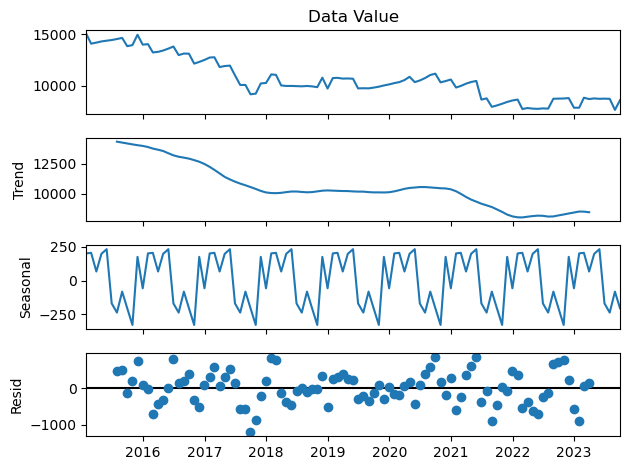

In [9]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Load the data
file_path = ('datasets/DRUG_OVER-2023.csv')
data = pd.read_csv(file_path, encoding='ascii')

# Convert 'Date' to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Aggregate data by date
monthly_data = data.groupby(pd.Grouper(freq='M')).sum()['Data Value']

# Decompose the time series to assess seasonality
result = seasonal_decompose(monthly_data, model='additive')

# Plot the decomposed time series components
plt.figure(figsize=(10, 6), facecolor='white')
result.plot()
plt.show()

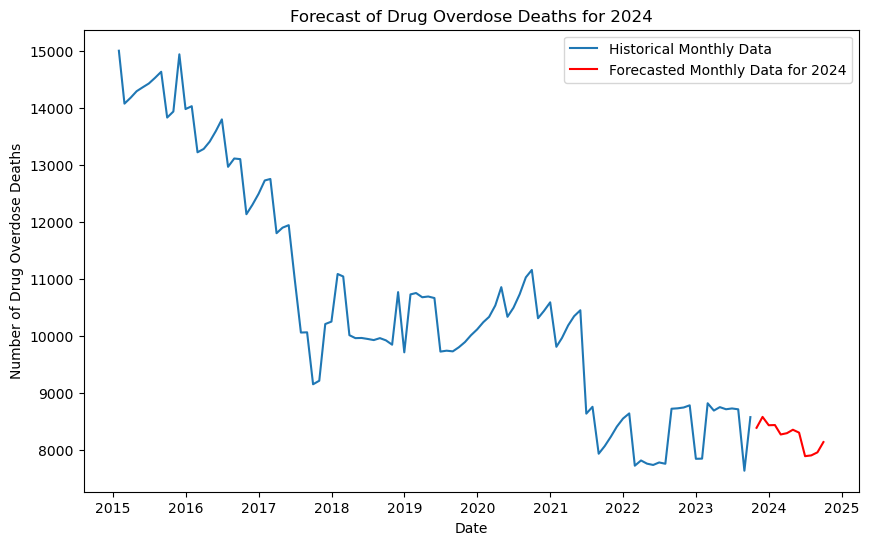

['Models/sarima_model.pkl']

In [12]:
# Fit SARIMA model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Monthly data, hence 12
model = SARIMAX(monthly_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast for the next 12 months (2024)
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(monthly_data.index, monthly_data, label='Historical Monthly Data')
plt.plot(forecast.index, forecast, label='Forecasted Monthly Data for 2024', color='red')
plt.title('Forecast of Drug Overdose Deaths for 2024')
plt.xlabel('Date')
plt.ylabel('Number of Drug Overdose Deaths')
plt.legend()
plt.show()
joblib.dump(model_fit, 'Models/sarima_model.pkl')
